In [1]:
%matplotlib inline
%env KERAS_BACKEND = tensorflow

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, LeakyReLU, Flatten, AveragePooling2D
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import Adam

env: KERAS_BACKEND=tensorflow


C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

x_train = (x_train - x_train.min())/(x_train.max() - x_train.min())
x_test = (x_test - x_test.min())/(x_test.max() - x_test.min())

model = Sequential()

In [7]:
model.add(Conv2D(4,(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('selu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8,(5,5),padding='same'))
model.add(Activation('selu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16,(5,5),padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(20))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_fit = model.fit(x_train, y_train, batch_size=200, epochs=30)
model.summary()

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1521 - acc: 0.9487: 3s - loss: 0.1574
Epoch 2/30
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0281 - acc: 0.9909
Epoch 3/30
60000/60000 [==============================] - 58s 975us/step - loss: 0.0190 - acc: 0.9937
Epoch 4/30
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0152 - acc: 0.9950
Epoch 5/30
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0128 - acc: 0.9958
Epoch 6/30
60000/60000 [==============================] - 59s 975us/step - loss: 0.0115 - acc: 0.9962
Epoch 7/30
60000/60000 [==============================] - 59s 976us/step - loss: 0.0100 - acc: 0.9967
Epoch 8/30
60000/60000 [==============================] - 58s 969us/step - loss: 0.0090 - acc: 0.9971
Epoch 9/30
60000/60000 [==============================] - 58s 959us/step - loss: 0.0083 - acc: 0.99733s - loss: 0
Epoch 10/30

In [9]:
score = model.evaluate(x_test,y_test)
print("loss :",score[0])
print("準確率 :",score[1])

10000/10000 [==============================] - 7s 692us/step
loss : 0.006873208377323317
準確率 : 0.9978099962234497


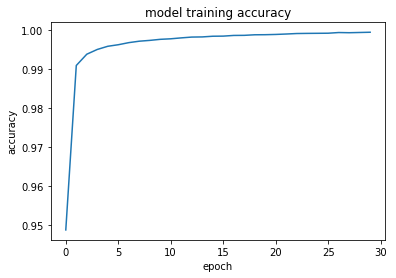

In [10]:
plt.plot(model_fit.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()